In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [5]:
vehicle_density = ctrl.Antecedent(np.arange(0, 101, 1), 'vehicle_density')
waiting_time = ctrl.Antecedent(np.arange(0, 31, 1), 'waiting_time')
light_duration = ctrl.Consequent(np.arange(0, 61, 1), 'light_duration')

In [6]:
vehicle_density['low'] = fuzz.trapmf(vehicle_density.universe, [0, 0, 20, 40])
vehicle_density['medium'] = fuzz.trimf(vehicle_density.universe, [20, 50, 80])
vehicle_density['high'] = fuzz.trapmf(vehicle_density.universe, [60, 80, 100, 100])

In [7]:
waiting_time['short'] = fuzz.trapmf(waiting_time.universe, [0, 0, 5, 10])
waiting_time['medium'] = fuzz.trimf(waiting_time.universe, [5, 15, 25])
waiting_time['long'] = fuzz.trapmf(waiting_time.universe, [20, 25, 30, 30])

In [8]:
light_duration['short'] = fuzz.trapmf(light_duration.universe, [0, 0, 10, 20])
light_duration['medium'] = fuzz.trimf(light_duration.universe, [10, 30, 50])
light_duration['long'] = fuzz.trapmf(light_duration.universe, [40, 50, 60, 60])

In [9]:
rule1 = ctrl.Rule(vehicle_density['low'] & waiting_time['short'], light_duration['short'])
rule2 = ctrl.Rule(vehicle_density['low'] & waiting_time['medium'], light_duration['medium'])
rule3 = ctrl.Rule(vehicle_density['low'] & waiting_time['long'], light_duration['long'])

rule4 = ctrl.Rule(vehicle_density['medium'] & waiting_time['short'], light_duration['medium'])
rule5 = ctrl.Rule(vehicle_density['medium'] & waiting_time['medium'], light_duration['medium'])
rule6 = ctrl.Rule(vehicle_density['medium'] & waiting_time['long'], light_duration['long'])

rule7 = ctrl.Rule(vehicle_density['high'] & waiting_time['short'], light_duration['medium'])
rule8 = ctrl.Rule(vehicle_density['high'] & waiting_time['medium'], light_duration['long'])
rule9 = ctrl.Rule(vehicle_density['high'] & waiting_time['long'], light_duration['long'])

In [10]:
traffic_light_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,
                                         rule4, rule5, rule6,
                                         rule7, rule8, rule9])

traffic_light_sim = ctrl.ControlSystemSimulation(traffic_light_ctrl)

In [11]:
traffic_light_sim.input['vehicle_density'] = 70
traffic_light_sim.input['waiting_time'] = 15

In [12]:
traffic_light_sim.compute()

In [13]:
print(f"Recommended green light duration: {traffic_light_sim.output['light_duration']} seconds")

Recommended green light duration: 38.8676844783715 seconds


C:\Users\mauli\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


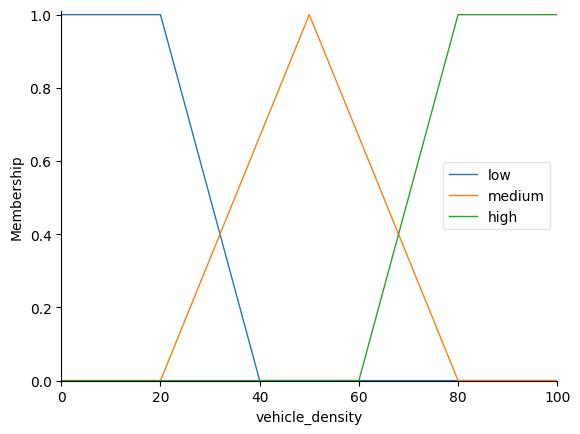

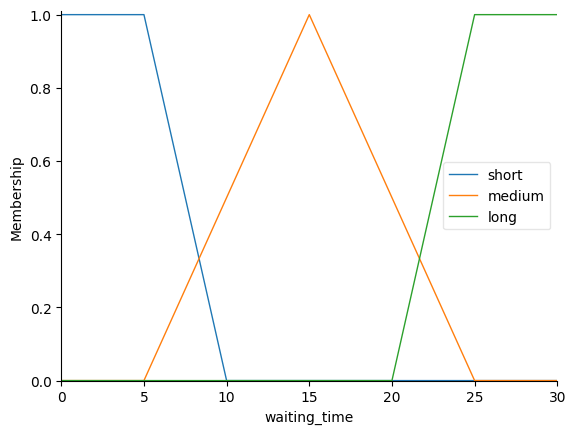

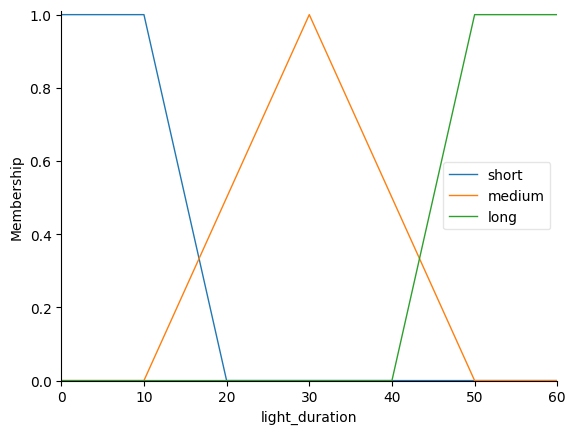

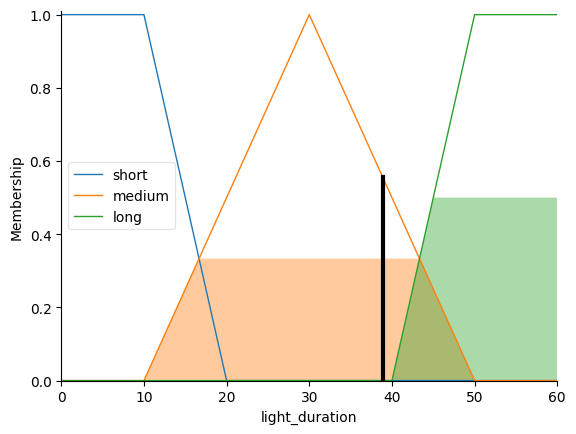

In [14]:
vehicle_density.view()
waiting_time.view()
light_duration.view()
light_duration.view(sim=traffic_light_sim)